# matplotlib - 2D in 3D risanje

Matplotlib je knjižnica za 2D in 3D risanje v programskem jeziku Python. Med drugimi lastnostmi vključuje:

* Nadzor nad posameznimi elementi slike.
* Izvoz rezultatov v PNG, PDF, SVG, EPS, in PGF.
* Podpora $\LaTeX$ sintaksi

Bistven del uporabnosti knjižnice je, da lahko slike v celoti zgradimo z uporabo ukazov, kar odstrani potrebo po ročnem urejanju. Slednje jo dela zelo primerno za uporabo v znanstvenem delu, kjer lahko enostavno generiramo kompleksne prikaze na različnih podatkih brez potrebe po spremembi programske kode.

Spletna stran knjižnice je tudi bogat vir dodatnih primerov: http://matplotlib.org/

Matplotlib uvozimo na dva načina. Najprej enostaven način (primeren za interaktivno uporabo)

In [1]:
from pylab import *

ali "čisti" način (primeren za poganjanje skript)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.1.0'

In [3]:
import numpy as np

Enostavna slika v matplotlib okolju:

In [4]:
x = np.linspace(0, 5, 10)
y = x ** 2

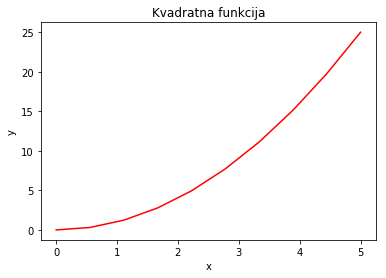

In [5]:
figure()
plot(x, y, 'r')    # plot(podatki na ordinati, podatki na abscisi, parametri oblikovanja, ...)
xlabel('x')
ylabel('y')
title('Kvadratna funkcija')
show()

<font color="green"><b>Naredi sam/-a.</b></font> Naredi novo sliko, kjer na isti sliki narišeš funkcije $ x^{-3}, x^{-2}, x^{-1}, x^0, x^1, x^2, x^3 $ na intervalu $(0, 5]$. To dosežeš z večkratnim klicanjem funkcije `plot`, po enkrat za vsako krivuljo.

In [6]:
# Nariši funkcije na isti graf
# ...

Z uporabo okolja `subplot` ustvarimo sliko z več platni.

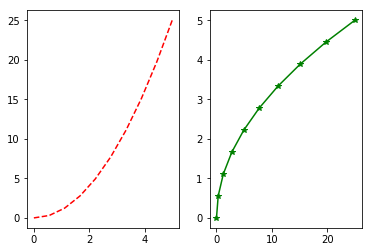

In [7]:
subplot(1,2,1)      # ustvari sliko z 1 x 2 platnoma in izberi prvo platno
plot(x, y, 'r--')   # narisi nekaj podatkov
subplot(1,2,2)      # na isti sliki izberi drugo platno
plot(y, x, 'g*-');  # ...

## Objektno-usmerjen način dela z matplotlib

V zgornjih primerih smo uporabljali vmesnik, kjer je bila vsaka slika del <i>globalnega</i> okolja. Ta način je uporaben za preprostejše slike. Zahtevnejše prikazi pa omogoča objektno usmerjen način, posebej v primerih ko imamo opravka z več kot eno sliko naenkrat.

Bistveni del objektno-usmerjenega okolja sta objekta <b>slika</b> (ang. <i>figure</i>) in <b>os</b> (ang. <i>axis</i>). Ena slika vsebuje eno ali več osi. Os je vsebovalnik s koordinatnim sistemom, v katerega rišemo objekte (črte, stolpce, oblike, ...). 


Ustvarimo novo sliko v spremenljivki `fig` ter ji dodajmo novo os, do katere dostopamo preko spremenljivke `axes`.

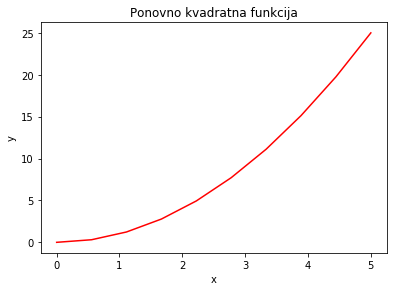

In [8]:
fig = plt.figure()

# Za občutek poskušaj spreminjati parametre
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # x koordinata osi relativno na sliko,
                                          # y koordinata osi relativno na sliko,
                                          # sirina,
                                          # visina

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ponovno kvadratna funkcija');

Sedaj imamo popoln nadzor nad vstavljanjem osi. Na sliko lahko dodamo poljubno število osi, ki se lahko tudi prekrivajo. 

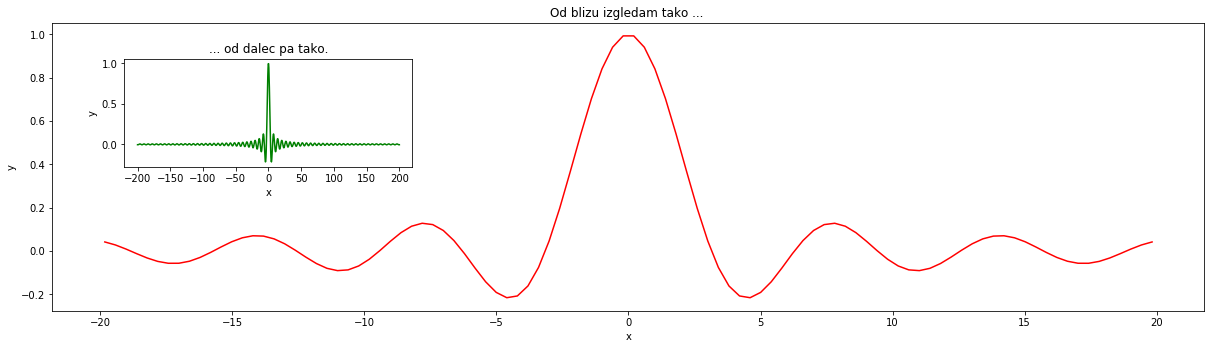

In [9]:
fig = plt.figure(figsize=(20, 5))

x = linspace(-200, 200, 1000)
y = sin(x)/x


axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # glavna os
axes2 = fig.add_axes([0.15, 0.5, 0.2, 0.3]) # os znotraj glavne osi. Pomemben je tudi vrstni red ustvarjanja!

# Prikazi okolico nicle
axes1.plot(x[450:550], y[450:550], 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Od blizu izgledam tako ... ')

# Prikazi vecji interval
axes2.plot(x, y, 'g')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('... od dalec pa tako.');

Za osi razporejene v lepo urejeno mrežo lahko uporabljamo upravljalnik `subplots`.

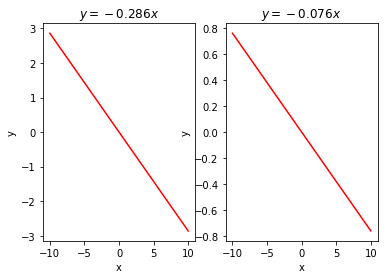

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

x = linspace(-10, 10, 100)

for ax in axes:                    # sprehodimo se po oseh
    k = np.random.randn(1, 1)[0]   # narisimo nakljucno premico
    y = k * x 
    
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('$y = %.3f x$'% k )
    
# fig.tight_layout()   # vključi za ne-prekrivanje osi

### Barve in druge lastnosti črt

#### Barvanje

Najenostavnejši načina za nastavljanje barv je slog, poben okolju MATLAB; `g` predstavlja zeleno barvo, `b` modro, `r` rdečo, itd.

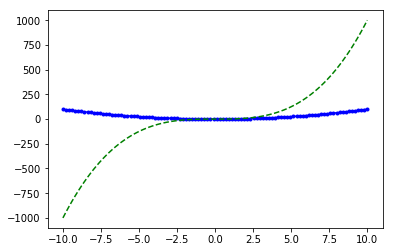

In [11]:
plt.figure()
plt.plot(x, x**2, 'b.-') # modra črta s označenimi točkami
plt.plot(x, x**3, 'g--') # green dashed line
plt.show()

Lahko pa uporabimo argument `color=...`, kjer barvo podamo z njenim imenom oz. RGB kodo. 

[]

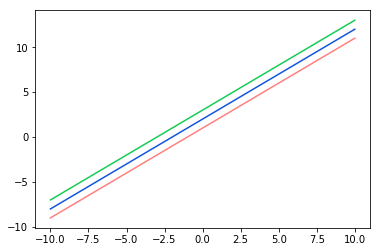

In [12]:
plt.figure()
plt.plot(x, x+1, color="red", alpha=0.5) # Parameter alpha določa transparentnost; preizkusi!
plt.plot(x, x+2, color="#1155dd")        
plt.plot(x, x+3, color="#15cc55") 
plt.plot()

#### Še več stilov

Poizkusimo spreminjati še ostale lastnosti: debelino črt in različne oznake za točke.

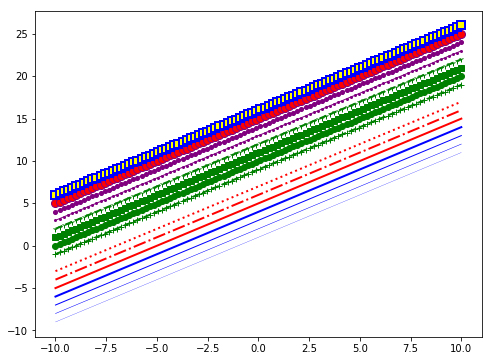

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# možnosti za izgled črte so ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')


# oznake za točke: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# velikost in barva označb
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Vizualizacije različnih tipov podatkov

Oglejmo si še druge metode, ki so primerne za risanje različnih tipov podatkov. Seveda je način prikaza odvisen od vrste in lastnosti podatkov, ki jo z vizualizacijo želimo poudariti.

In [14]:
n = np.array([0,1,2,3,4,5])

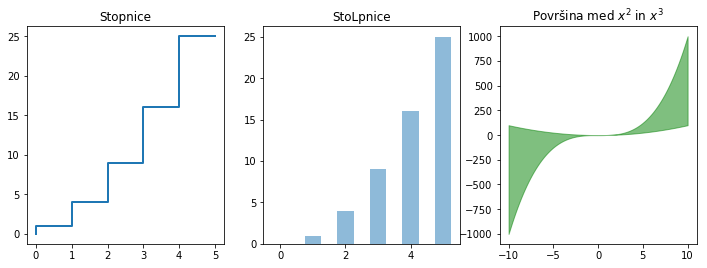

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

# Stopnice
axes[0].step(n, n**2, lw=2)
axes[0].set_title("Stopnice")

# Stolpični diagram
axes[1].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[1].set_title("StoLpnice")

# Površina med krivuljama kvadratne in kubične funkcije
axes[2].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[2].set_title("Površina med $x^2$ in $x^3$");

### Verjetnostne porazdelitve

Verjetnosto porazdelitev končnega števila pogosto predstavimo s <i>histogramom</i> - stolpičnim diagramom ki predstavlja število oz. verjetnost vrednosti spremenljivke.

Naj bo $x$ naključna spremenljivka, porazdeljena po normalni (Gaussovi) porazdelitvi s sredino $\mu = 0$ in standardnim odklonom $\sigma = 1$.

Vzamimo $N$ naključnih vzorcev spremenljivke $x$. Funkcija `hist` izriše stolpični diagram verjetnostne porazdelitve glede na izide vzorčenj. 


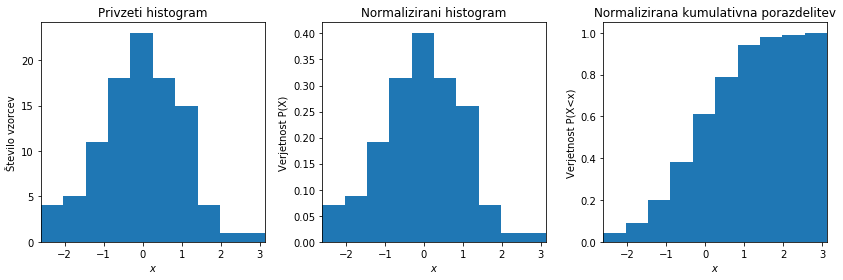

In [16]:
# Histogram verjetnostne porazdelitve števil
N = 100
data = np.random.randn(N) # vzorčimo N točk
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].hist(data, bins=10)
axes[0].set_title("Privzeti histogram")
axes[0].set_xlim((min(data), max(data)));
axes[0].set_ylabel("Število vzorcev")
axes[0].set_xlabel("$x$")

axes[1].hist(data,  normed=True, bins=10)
axes[1].set_title("Normalizirani histogram")
axes[1].set_xlim((min(data), max(data)));
axes[1].set_ylabel("Verjetnost P(X)")
axes[1].set_xlabel("$x$")

axes[2].hist(data, cumulative=True, bins=10, normed=True)
axes[2].set_title("Normalizirana kumulativna porazdelitev")
axes[2].set_ylabel("Verjetnost P(X<x)")
axes[2].set_xlim((min(data), max(data)));
axes[2].set_xlabel("$x$")

fig.tight_layout()

<font color="green"><b>Naredi sam/a.</b></font> Poizkusi spreminjati število vzorcev `N` in predalčkov `bins`. Ali so katere nastavitve primernejše od drugih v odvisnosti od števila vzorcev?

<font color="blue"><b>Razmisli.</b></font> Funkcija `randn` predpostavlja sredino $\mu = 0$ in standardnim odklon $\sigma = 1$. Kako bi modelirali poljubno sredino in standardni odklon, npr. $\mu=5$ in $\sigma=0.5$?

### Barvni zemljevidi in konture

Barvne zemljevide ("termične" slike) uporabljamo za prikazovanje funkcij dveh spremenljivk. Imamo več možnosti, poglejmo. Narišimo funkcijo dveh spremenljivk
$$ z = sin(x) cos(y) $$

In [17]:
def func(x, y):
    return np.sin(x) * np.cos(y)

In [18]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X,Y = np.meshgrid(x, y)
Z = func(X, Y)

#### pcolor

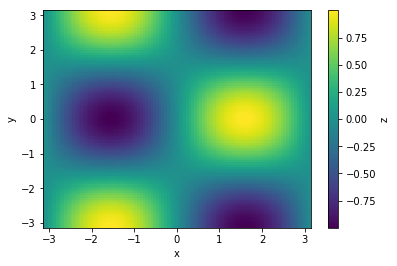

In [19]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z,)
cb = fig.colorbar(p, ax=ax, label="z")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi)
show()

<font color="blue">Modre</font> vrednosti so vbočene v ekran, <font color="red">Rdeče</font> pa izbočene.

#### imshow

Dobimo čistejšo sliko tako, da uporabimo algoritem za interpolacijo.

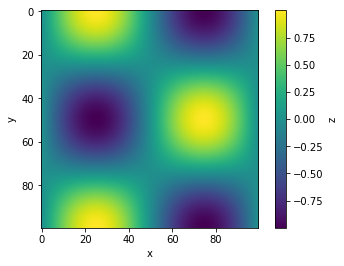

In [20]:
fig, ax = plt.subplots()
im = ax.imshow(Z)
ax.set_xlabel("x")
ax.set_ylabel("y")
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax, label="z")

#### contour

Konture uporabimo, da prikažemo točke z enako vrednostjo funkcije - podobno kot z izohipsami povežemotočke z isto višino na zemljevidu.

Narišimo naključno kvadratno funkcijo
$$z = a_1 x^2 + a_2 y^2 + a_3 x y$$
kjer koeficiente $a_1, a_2, a_3$ določimo naključno.

Text(0,0.5,'y')

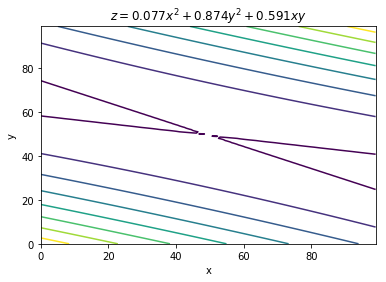

In [21]:
def random_square_function_2D(x, y, a):
    return a[0] * x**2 + a[1] * y**2 + a[2] * x * y

a = np.random.rand(3, 1)
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.linspace(-np.pi, np.pi, 100)
X,Y = np.meshgrid(x1, y1)
Z = random_square_function_2D(X, Y, a)

fig, ax = plt.subplots()
im = ax.contour(Z)
ax.set_title("$z = %.3f x^2 + %.3f y^2 + %.3f x y$" % (a[0], a[1], a[2]))
ax.set_xlabel("x")
ax.set_ylabel("y")

### Nadzor nad velikostjo osi

V tem sklopu bomo spremenili velikost slike in nastavili razpon (interval) podatkov, ki bodo prikazani.

#### Domet

Za boljšo preglednost slike omejimo zgolj na domeno podatkov: ročno z uporabo `set_ylim` in `set_xlim` ali pa samodejno z `axis('tight')`.

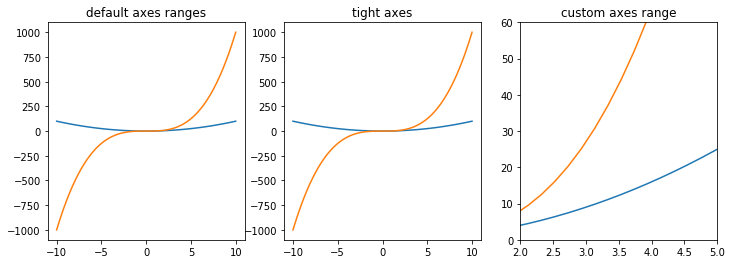

In [22]:
x = linspace(-10, 10, 100)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Logaritemska lestvica

Enostavno nastavimo tudi logaritemsko naraščanje intervalov na posameznih oseh.

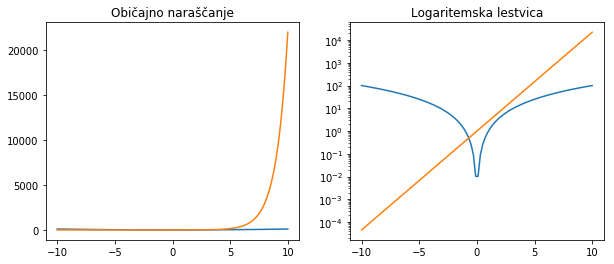

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Običajno naraščanje")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logaritemska lestvica");

### Nastavitev oznak na oseh

Z metodama `set_xticks` in `set_yticks` nastavimo <i>lokacije</i> oznak, nato pa z  `set_xticklabels` in `set_yticklabels` eksplicitno določimo oznake.

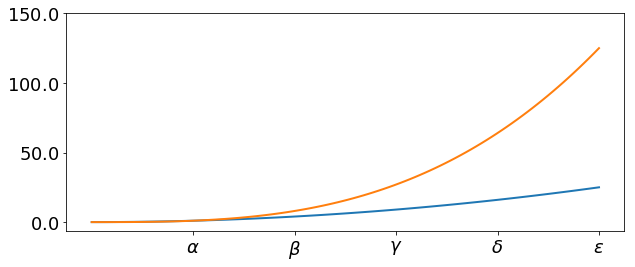

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
x = linspace(0, 5, 100)
ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

### Velikost, razmerje in ločljivost

Velikost slike določamo s `figsize` v palcih (inčah, 1 in = 2.4 cm) ločljivost pa s parametrom `dpi` - število pik (pikslov) na palec. inch). Slednji ukaz ustvari sliko velikosti 800x400 pik.

In [25]:
fig = plt.figure(figsize=(8,4), dpi=100)

Še drugače:

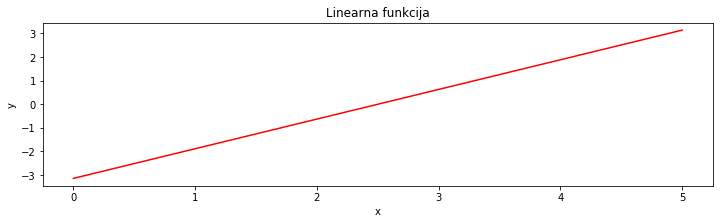

In [26]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Linearna funkcija');

### Legenda, oznake in naslovi

Za boljšo berljivost slike pogosto dodamo naslov, oznake osi in legendo. Na vseh mestih lahko uporabljamo $\LaTeX$ sintakso. Kvalitetna slika vsebuje večino omenjenih elementov.

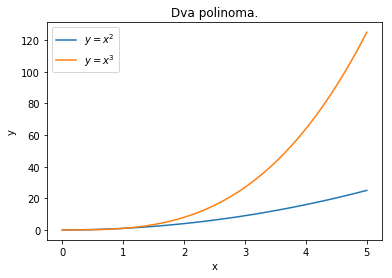

In [27]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x**3, label="$y = x^3$")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Dva polinoma.');

### Shranjevanje slike

Za shranjevanje uporabimo metodo `savefig`, kjer lahko izbiramo med formati PNG, JPG, EPS, SVG, PGF in PDF.

In [28]:
fig.savefig("filename.png")

Ločljivost nastavimo v enotah DPI - ang. <i>dots per inch</i>.

In [29]:
fig.savefig("filename.png", dpi=200)